In [85]:
import requests
from pprint import pprint
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns
import seaborn.objects as so

In [67]:
#Example api call (the list of phenotypes are annotations of the input disease MONDO:0010196)

sim_url = "https://api-gcp.monarchinitiative.org/api/sim/compare"
example_payload = {
    "is_feature_set": False,
    "reference_ids": [
        "HP:0004415",
        "HP:0200042",
        "HP:0200055",
        "HP:0004322",
        "HP:0002858",
        "HP:0002860",
        "HP:0002861",
        "HP:0002890",
        "HP:0009726",
        "HP:0002672",
        "HP:0002669",
        "HP:0002664",
        "HP:0002621",
        "HP:0009125",
        "HP:0002211",
        "HP:0002209",
        "HP:0007703",
        "HP:0000962",
        "HP:0000939",
        "HP:0007618",
        "HP:0000869",
        "HP:0000819",
        "HP:0000765",
        "HP:0007495",
        "HP:0012060",
        "HP:0012056",
        "HP:0010721",
        "HP:0000444",
        "HP:0005978",
        "HP:0000275",
        "HP:0010468",
        "HP:0000135",
        "HP:0008065",
        "HP:0000035",
        "HP:0001608",
        "HP:0001635",
        "HP:0005328",
        "HP:0005268",
        "HP:0000546",
        "HP:0003777",
        "HP:0003202",
        "HP:0100833",
        "HP:0003002",
        "HP:0005177",
        "HP:0001838",
        "HP:0100679",
        "HP:0100659",
        "HP:0100649",
        "HP:0100615",
        "HP:0001658",
        "HP:0001601",
        "HP:0100585",
        "HP:0100578",
        "HP:0100526",
        "HP:0001595",
        "HP:0001533",
        "HP:0100324",
        "HP:0001387",
        "HP:0000144",
        "HP:0100242",
        "HP:0000518",
        "HP:0011001",
        "HP:0000822",
        "HP:0000855",
        "HP:0000934",
        "HP:0002216"
    ],
    "query_ids": [
        [
            "MONDO:0018203", "MONDO:0010196"
        ]
    ]
}

In [68]:
# this is a test subset, just paste in all your onset diseases
onset_diseases = ["MONDO:0010196", "MONDO:0018203", "MONDO:0015404", "MONDO:0009312"]

In [69]:
def compare_diseases(d1, d2):
    sim_url = "https://api-gcp.monarchinitiative.org/api/sim/compare"
    payload = {
    "is_feature_set": False,
    "reference_ids": [d1],
    "query_ids": [[d2]]
    }
    r = requests.post(sim_url, json=payload)
    return r.json()
    
    

In [79]:
sim_data = []
for disease_ref in onset_diseases:
    for disease_target in onset_diseases:
        result = compare_diseases(disease_ref, disease_target)
        reference = result['query']['reference']
        ref_id = reference['id']
        ref_label = reference['label']
        matches = result['matches']
        sim_data.append(
            {"reference_id": ref_id, 
             "reference_label": ref_label, 
             "match_id": matches[0]['id'], 
             "match_label": matches[0]['label'], 
             "score": matches[0]['score']})

In [87]:
sim_data = pd.DataFrame(sim_data)
sim_data

,reference_id,reference_label,match_id,match_label,score
0,MONDO:0010196,Werner syndrome,MONDO:0010196,Werner syndrome,100.0
1,MONDO:0010196,Werner syndrome,MONDO:0018203,LMNA-related cardiocutaneous progeria syndrome,67.0
2,MONDO:0010196,Werner syndrome,MONDO:0015404,rapidly involuting congenital hemangioma,67.0
3,MONDO:0010196,Werner syndrome,MONDO:0009312,lipodystrophy due to peptidic growth factors d...,65.0
4,MONDO:0018203,LMNA-related cardiocutaneous progeria syndrome,MONDO:0010196,Werner syndrome,71.0
5,MONDO:0018203,LMNA-related cardiocutaneous progeria syndrome,MONDO:0018203,LMNA-related cardiocutaneous progeria syndrome,100.0
6,MONDO:0018203,LMNA-related cardiocutaneous progeria syndrome,MONDO:0015404,rapidly involuting congenital hemangioma,60.0
7,MONDO:0018203,LMNA-related cardiocutaneous progeria syndrome,MONDO:0009312,lipodystrophy due to peptidic growth factors d...,67.0
8,MONDO:0015404,rapidly involuting congenital hemangioma,MONDO:0010196,Werner syndrome,60.0
9,MONDO:0015404,rapidly involuting congenital hemangioma,MONDO:0018203,LMNA-related cardiocutaneous progeria syndrome,51.0


In [86]:
sns.set_theme()

In [89]:
result = sim_data.pivot(index='reference_label', columns='match_label', values='score')


In [90]:
result

match_label,LMNA-related cardiocutaneous progeria syndrome,Werner syndrome,lipodystrophy due to peptidic growth factors deficiency,rapidly involuting congenital hemangioma
reference_label,,,,
LMNA-related cardiocutaneous progeria syndrome,100.0,71.0,67.0,60.0
Werner syndrome,67.0,100.0,65.0,67.0
lipodystrophy due to peptidic growth factors deficiency,75.0,78.0,100.0,59.0
rapidly involuting congenital hemangioma,51.0,60.0,45.0,100.0


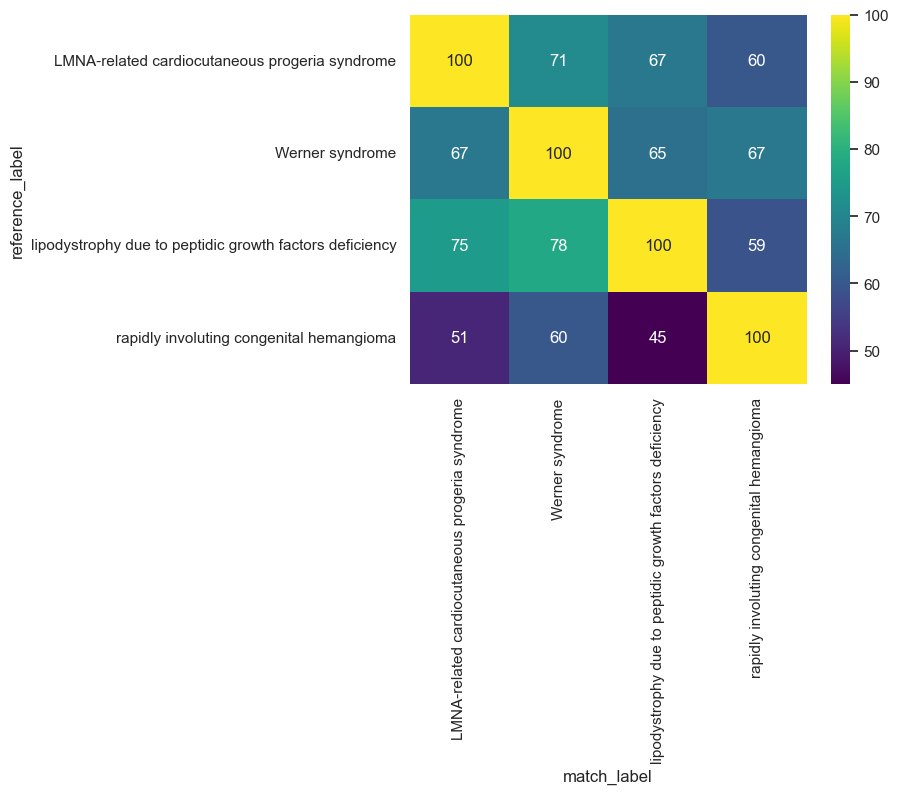

In [91]:
sns.heatmap(result, annot=True, fmt="g", cmap='viridis')
plt.show()